In [3]:
import pandas as pd
import experiment_util as util
import models
import numpy as np
from ucimlrepo import fetch_ucirepo
import random
import matplotlib.pyplot as plt
import plot_util as putil

np.random.seed(0)
random.seed(0)

In [2]:
diabetes = fetch_ucirepo(id=296) 

raw_df=pd.DataFrame(diabetes.data.original)

df=raw_df.copy()
df

/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [3]:
df["readmitted"]=df["readmitted"].replace(['<30','>30'],['Yes','Yes'])
#unifiying <30 and >30 label to simplify the dataset task (as well as make different datasets comparable)
df=df.replace(['?'],[np.nan])
#Unifiying missing values
df=df.drop(df.loc[df["gender"]=="Unknown/Invalid",].index, axis=0)
#Remove rows where gender value are invalide
pre_df=util.preporcess_transform(df)

In [4]:
folds_index=np.array_split(df.sample(frac=1).index,5)
eval=util.evaluation(df,"gender","readmitted","Male",folds_index)
result=pd.DataFrame([],columns=util.column)
result.columns.name="Diabetes"
result

Diabetes,Accuracy,False Omissin Rate Disparity,False Discover Rate Disparity,Predicted Positive Ratio Disparity,Predicted Prevalance Disparity


In [5]:
result=util.append_Series(result,eval.cross_validation("Random Forest",models.RandomForest,pre_df))
result

/home/kdai332/Documents/Ethical-Framework/Aequitas/experiment_util.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df=pd.concat([dataframe,pd.DataFrame([series.to_list()],index=[series.name],columns=column)])


Diabetes,Accuracy,False Omissin Rate Disparity,False Discover Rate Disparity,Predicted Positive Ratio Disparity,Predicted Prevalance Disparity
Random Forest,0.662765,1.073921,1.02714,1.244173,1.069579


In [6]:
result=util.append_Series(result,eval.cross_validation("Gradient Boost",models.GradientBoost,pre_df))
result

Diabetes,Accuracy,False Omissin Rate Disparity,False Discover Rate Disparity,Predicted Positive Ratio Disparity,Predicted Prevalance Disparity
Random Forest,0.662765,1.073921,1.027140,1.244173,1.069579
Gradient Boost,0.662500,1.056559,1.031944,1.229241,1.057022


In [7]:
result=util.append_Series(result,eval.cross_validation("FairGBM",models.Fairgbm,pre_df))
result

Diabetes,Accuracy,False Omissin Rate Disparity,False Discover Rate Disparity,Predicted Positive Ratio Disparity,Predicted Prevalance Disparity
Random Forest,0.662765,1.073921,1.027140,1.244173,1.069579
Gradient Boost,0.662500,1.056559,1.031944,1.229241,1.057022
FairGBM,0.628018,1.036647,1.041063,1.214090,1.043872


In [8]:
result=util.append_Series(result,eval.cross_validation("FairLearn",models.Fairlearn,pre_df))
result

[INFO] 2024-02-13 22:53:42 methods.inprocessing.ExponentiatedGradient - Instantiating estimator '<class 'lightgbm.sklearn.LGBMClassifier'>' with parameters: {'boosting_type': 'dart', 'enable_bundle': False, 'n_estimators': 100, 'num_leaves': 10, 'min_child_samples': 50, 'learning_rate': 0.01, 'n_jobs': 1}.
[INFO] 2024-02-13 22:53:42 methods.inprocessing.ExponentiatedGradient - Instantiating constraint '<class 'fairlearn.reductions._moments.utility_parity.FalsePositiveRateParity'>' with parameters: {}.
[INFO] 2024-02-13 22:53:42 methods.inprocessing.ExponentiatedGradient - Instantiating reduction '<class 'fairlearn.reductions._exponentiated_gradient.exponentiated_gradient.ExponentiatedGradient'>' with parameters: {'eps': 0.05, 'max_iter': 10}.


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_moments/utility_parity.py:214: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.pos_basis[i]["+", e, g] = 1
/home/kdai332/.conda/envs/Aequitas-venv/

[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37578, number of negative: 43832
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1783
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461589 -> initscore=-0.153945
[LightGBM] [Info] Start training from score -0.153945


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[INFO] 2024-02-13 22:55:07 methods.inprocessing.ExponentiatedGradient - Instantiating estimator '<class 'lightgbm.sklearn.LGBMClassifier'>' with parameters: {'boosting_type': 'dart', 'enable_bundle': False, 'n_estimators': 100, 'num_leaves': 10, 'min_child_samples': 50, 'learning_rate': 0.01, 'n_jobs': 1}.
[INFO] 2024-02-13 22:55:07 methods.inprocessing.ExponentiatedGradient - Instantiating constraint '<class 'fairlearn.reductions._moments.utility_parity.FalsePositiveRateParity'>' with parameters: {}.
[INFO] 2024-02-13 22:55:07 methods.inprocessing.ExponentiatedGradient - Instantiating reduction '<class 'fairlearn.reductions._exponentiated_gradient.exponentiated_gradient.ExponentiatedGradient'>' with parameters: {'eps': 0.05, 'max_iter': 10}.


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_moments/utility_parity.py:214: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.pos_basis[i]["+", e, g] = 1
/home/kdai332/.conda/envs/Aequitas-venv/

[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37518, number of negative: 43892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460852 -> initscore=-0.156911
[LightGBM] [Info] Start training from score -0.156911


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[INFO] 2024-02-13 22:56:19 methods.inprocessing.ExponentiatedGradient - Instantiating estimator '<class 'lightgbm.sklearn.LGBMClassifier'>' with parameters: {'boosting_type': 'dart', 'enable_bundle': False, 'n_estimators': 100, 'num_leaves': 10, 'min_child_samples': 50, 'learning_rate': 0.01, 'n_jobs': 1}.
[INFO] 2024-02-13 22:56:19 methods.inprocessing.ExponentiatedGradient - Instantiating constraint '<class 'fairlearn.reductions._moments.utility_parity.FalsePositiveRateParity'>' with parameters: {}.
[INFO] 2024-02-13 22:56:19 methods.inprocessing.ExponentiatedGradient - Instantiating reduction '<class 'fairlearn.reductions._exponentiated_gradient.exponentiated_gradient.ExponentiatedGradient'>' with parameters: {'eps': 0.05, 'max_iter': 10}.


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_moments/utility_parity.py:214: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.pos_basis[i]["+", e, g] = 1
/home/kdai332/.conda/envs/Aequitas-venv/

[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37535, number of negative: 43875
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1780
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.461061 -> initscore=-0.156071
[LightGBM] [Info] Start training from score -0.156071


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[INFO] 2024-02-13 22:57:45 methods.inprocessing.ExponentiatedGradient - Instantiating estimator '<class 'lightgbm.sklearn.LGBMClassifier'>' with parameters: {'boosting_type': 'dart', 'enable_bundle': False, 'n_estimators': 100, 'num_leaves': 10, 'min_child_samples': 50, 'learning_rate': 0.01, 'n_jobs': 1}.
[INFO] 2024-02-13 22:57:45 methods.inprocessing.ExponentiatedGradient - Instantiating constraint '<class 'fairlearn.reductions._moments.utility_parity.FalsePositiveRateParity'>' with parameters: {}.
[INFO] 2024-02-13 22:57:45 methods.inprocessing.ExponentiatedGradient - Instantiating reduction '<class 'fairlearn.reductions._exponentiated_gradient.exponentiated_gradient.ExponentiatedGradient'>' with parameters: {'eps': 0.05, 'max_iter': 10}.


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_moments/utility_parity.py:214: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.pos_basis[i]["+", e, g] = 1
/home/kdai332/.conda/envs/Aequitas-venv/

[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37515, number of negative: 43896
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460810 -> initscore=-0.157082
[LightGBM] [Info] Start training from score -0.157082


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[INFO] 2024-02-13 22:58:56 methods.inprocessing.ExponentiatedGradient - Instantiating estimator '<class 'lightgbm.sklearn.LGBMClassifier'>' with parameters: {'boosting_type': 'dart', 'enable_bundle': False, 'n_estimators': 100, 'num_leaves': 10, 'min_child_samples': 50, 'learning_rate': 0.01, 'n_jobs': 1}.
[INFO] 2024-02-13 22:58:56 methods.inprocessing.ExponentiatedGradient - Instantiating constraint '<class 'fairlearn.reductions._moments.utility_parity.FalsePositiveRateParity'>' with parameters: {}.
[INFO] 2024-02-13 22:58:56 methods.inprocessing.ExponentiatedGradient - Instantiating reduction '<class 'fairlearn.reductions._exponentiated_gradient.exponentiated_gradient.ExponentiatedGradient'>' with parameters: {'eps': 0.05, 'max_iter': 10}.


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_moments/utility_parity.py:214: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.pos_basis[i]["+", e, g] = 1
/home/kdai332/.conda/envs/Aequitas-venv/

[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008994 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


[LightGBM] [Info] Number of positive: 37462, number of negative: 43949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1781
[LightGBM] [Info] Number of data points in the train set: 81411, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460159 -> initscore=-0.159703
[LightGBM] [Info] Start training from score -0.159703


/home/kdai332/.conda/envs/Aequitas-venv/lib/python3.10/site-packages/fairlearn/reductions/_exponentiated_gradient/_lagrangian.py:246: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_error = self.obj.gamma(h)[0]


Diabetes,Accuracy,False Omissin Rate Disparity,False Discover Rate Disparity,Predicted Positive Ratio Disparity,Predicted Prevalance Disparity
Random Forest,0.662765,1.073921,1.027140,1.244173,1.069579
Gradient Boost,0.662500,1.056559,1.031944,1.229241,1.057022
FairGBM,0.628018,1.036647,1.041063,1.214090,1.043872
FairLearn,0.624883,1.070360,1.032743,1.250047,1.075866


c:\Users\15783\source\repos\Ethical-Framework\Aequitas\plot_util.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(x[i]-x_range*0.15,y[i]+y_range*0.02,annotations[i])


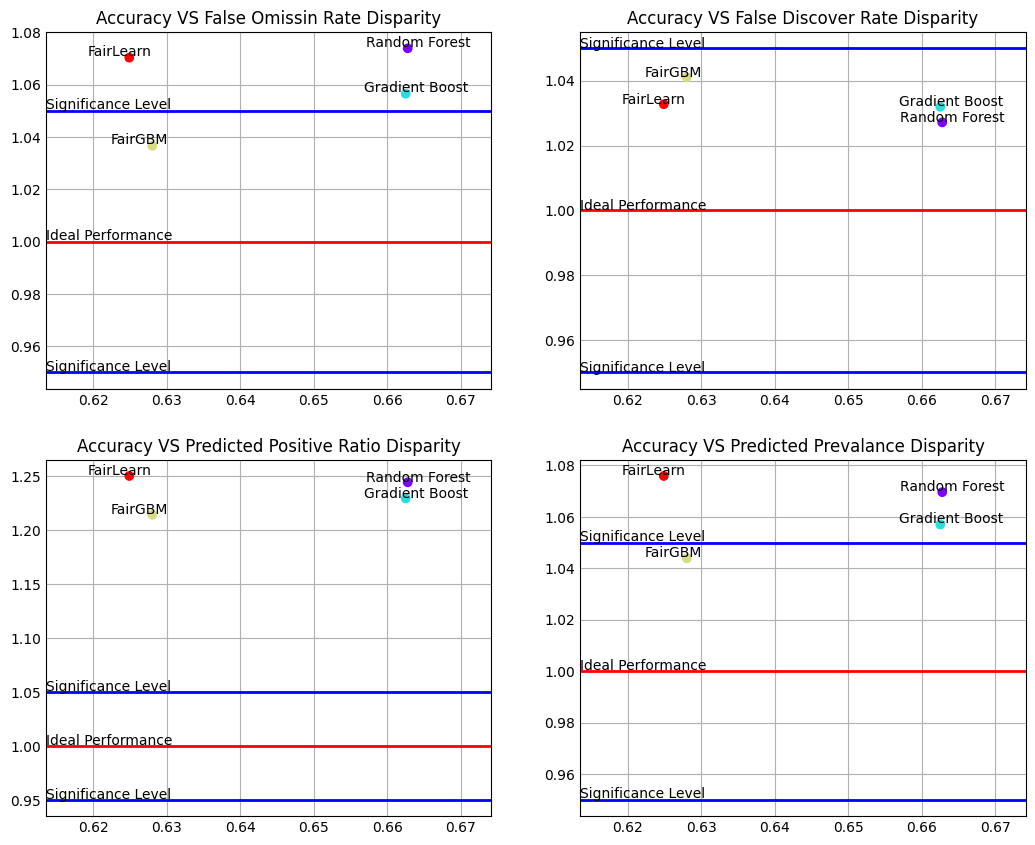

In [4]:
plt.style.use('_mpl-gallery')


# plot
fig, ax = plt.subplots(2,2,figsize=(10,8))

putil.plot_scatter(ax[0][0],result["Accuracy"],result["False Omissin Rate Disparity"],"Accuracy VS False Omissin Rate Disparity",result.index)
putil.plot_scatter(ax[0][1],result["Accuracy"],result["False Discover Rate Disparity"],"Accuracy VS False Discover Rate Disparity",result.index)
putil.plot_scatter(ax[1][0],result["Accuracy"],result["Predicted Positive Ratio Disparity"],"Accuracy VS Predicted Positive Ratio Disparity",result.index)
putil.plot_scatter(ax[1][1],result["Accuracy"],result["Predicted Prevalance Disparity"],"Accuracy VS Predicted Prevalance Disparity",result.index)

plt.show()